In [10]:
from settings import *

In [11]:
H = create_hamiltonian(system), 0.1

In [12]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

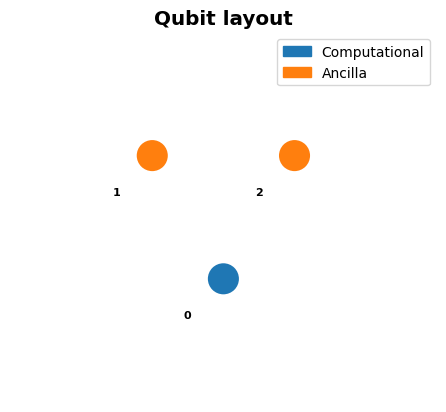

In [13]:
qubits.show_layout()

In [14]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100, theta_init=np.ones(circuit.P)*0.1)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=50756


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.09866370771716149 
            Current gradient: [ 9.86637077e-02  3.60822483e-12  4.16333634e-12  5.40212171e-02
 -2.17309907e-02 -2.17309907e-02  9.73685572e-02  3.40096034e-04
  3.40096033e-04 -5.85736826e-03  9.73685572e-02  3.40096033e-04
  3.40096033e-04  5.66430944e-02 -1.89325973e-02 -1.89325973e-02
  9.61954532e-02  4.22667233e-04  4.22667233e-04 -1.30697809e-02
  9.61954532e-02  4.22667232e-04  4.22667232e-04  5.90424684e-02
 -1.50945408e-02 -1.50945408e-02  9.51879972e-02  3.24940846e-04
  3.24940847e-04 -2.14311142e-02  9.51879972e-02  3.24940847e-04
  3.24940846e-04  6.10475241e-02 -1.04632208e-02 -1.04632208e-02
  9.43767778e-02  1.46576290e-04  1.46576290e-04 -3.06895964e-02
  9.43767778e-02  1.46576290e-04  1.46576290e-04  6.25004537e-02
 -5.32955800e-03 -5.32955800e-03  9.37754543e-02 -2.77555756e-13
 -1.38777878e-13 -4.05715718e-02] 
            Current error: 0.18408761063480444 
            Current sigma values: (0, 1, 

In [15]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [16]:
theta_opt

array([-0.81861621,  0.1       ,  0.1       , -0.56891883,  0.69743607,
        0.69743607, -0.82729585,  0.14692013,  0.14692013,  0.42613451,
       -0.82729585,  0.14692013,  0.14692013, -0.44790837,  0.57720925,
        0.57720925, -0.77287027,  0.14368769,  0.14368769,  0.48867951,
       -0.77287027,  0.14368769,  0.14368769, -0.58791178,  0.44949268,
        0.44949268, -0.97888076,  0.10314714,  0.10314714,  0.9877492 ,
       -0.97888076,  0.10314714,  0.10314714, -0.37607743,  0.40525566,
        0.40525566, -0.79834103,  0.1138686 ,  0.1138686 ,  0.75911126,
       -0.79834103,  0.1138686 ,  0.1138686 , -0.49711702,  0.29062602,
        0.29062602, -0.69770368,  0.1       ,  0.1       ,  0.95424294])

rho_rand_haar: seed=5618


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

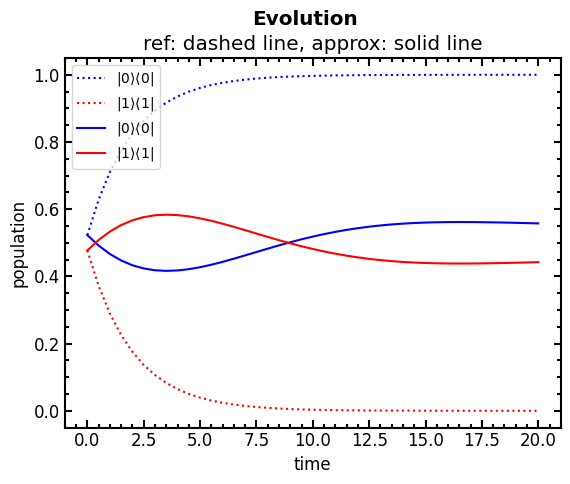

In [17]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

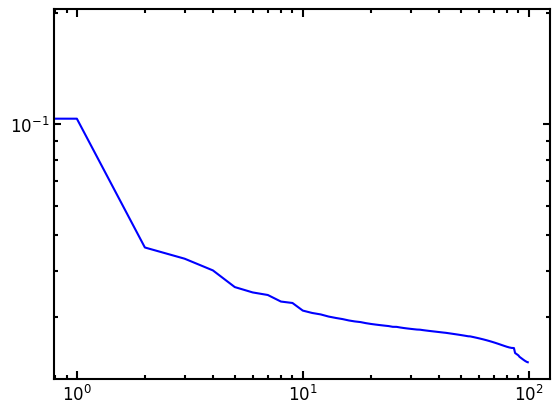

In [18]:
plt.loglog(errors)